In [1]:
pip install simple-pid

Note: you may need to restart the kernel to use updated packages.


In [3]:
from simple_pid import PID
pid = PID(1, 0.1, 0.05, setpoint=1)

# Assume we have a system we want to control in controlled_system
v = PID.controlled_system.update(0)

while True:
    # Compute new output from the PID according to the systems current value
    control = pid(v)
    
    # Feed the PID output to the system and get its current value
    v = PID.controlled_system.update(control)

AttributeError: type object 'PID' has no attribute 'controlled_system'

In [4]:
def numbers_gen():
    yield 0
    yield 1
    yield 2.7182818
    yield 3.1415926

In [5]:
numbers = numbers_gen()

In [6]:
print(next(numbers))
print(next(numbers))
print(next(numbers))
print(next(numbers))

0
1
2.7182818
3.1415926


In [7]:
numbers = numbers_gen()
print(numbers.send(None))
print(numbers.send(None))
print(numbers.send(None))
print(numbers.send(None))

0
1
2.7182818
3.1415926


In [8]:
def proportional(Kp, SP):
    """Creates proportional controllers with specified gain and setpoint."""
    MV = 0
    while True:
        PV = yield MV
        MV = Kp * (SP - PV)

In [9]:
controller1 = proportional(10, 40)
controller1.send(None)

controller2 = proportional(1, 40)
controller2.send(None)

0

In [10]:
PV = 35

print("Controller 1: MV = ", controller1.send(PV))
print("Controller 2: MV = ", controller2.send(PV))

Controller 1: MV =  50
Controller 2: MV =  5


In [11]:
def PID(Kp, Ki, Kd, MV_bar=0):
    # initialize stored data
    e_prev = 0
    t_prev = -100
    I = 0
    
    # initial control
    MV = MV_bar
    
    while True:
        # yield MV, wait for new t, PV, SP
        t, PV, SP = yield MV
        
        # PID calculations
        e = SP - PV
        
        P = Kp*e
        I = I + Ki*e*(t - t_prev)
        D = Kd*(e - e_prev)/(t - t_prev)
        
        MV = MV_bar + P + I + D
        
        # update stored data for next iteration
        e_prev = e
        t_prev = t

In [14]:
pip install tclab

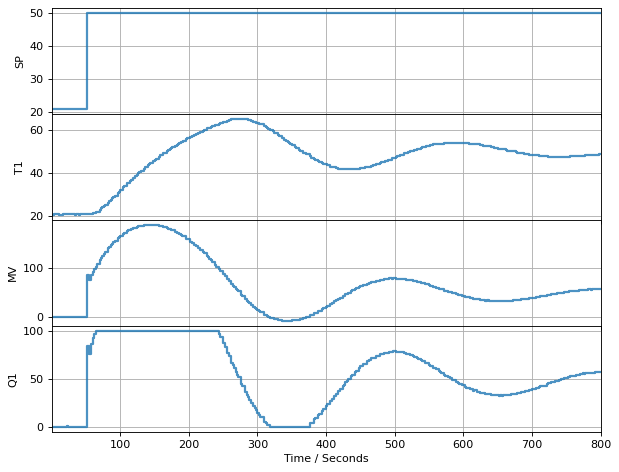

TCLab Model disconnected successfully.


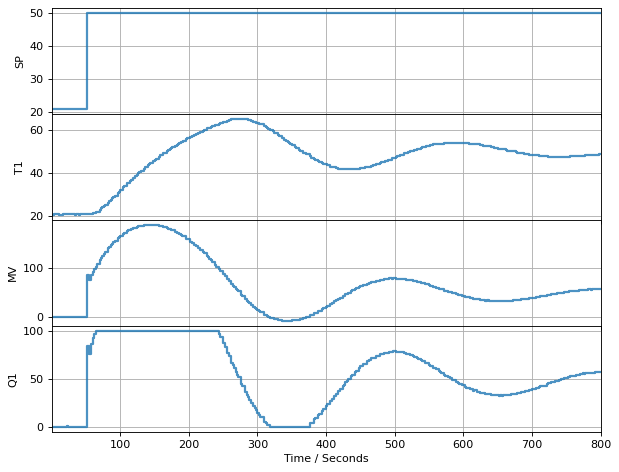

In [13]:
%matplotlib inline
from tclab import clock, setup, Historian, Plotter

TCLab = setup(connected=False, speedup=10)

controller = PID(2, 0.1, 2)        # create pid control
controller.send(None)              # initialize

tfinal = 800

with TCLab() as lab:
    h = Historian([('SP', lambda: SP), ('T1', lambda: lab.T1), ('MV', lambda: MV), ('Q1', lab.Q1)])
    p = Plotter(h, tfinal)
    T1 = lab.T1
    for t in clock(tfinal, 2):
        SP = T1 if t < 50 else 50           # get setpoint
        PV = lab.T1                         # get measurement
        MV = controller.send([t, PV, SP])   # compute manipulated variable
        lab.U1 = MV                         # apply 
        p.update(t)                         # update information display